# Implementing linear regression algorithm

## Quadratic linear regression

Importing the libraries

In [8]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

Reading the data

In [9]:
trainData = pd.read_csv('./train.csv')
trainData.drop(trainData[trainData['x'] > 100].index,inplace = True)
print(trainData)
trainData = trainData.values
testData = pd.read_csv('./test.csv')
testData = testData.values

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[699 rows x 2 columns]


Plotting the data using matplotlib

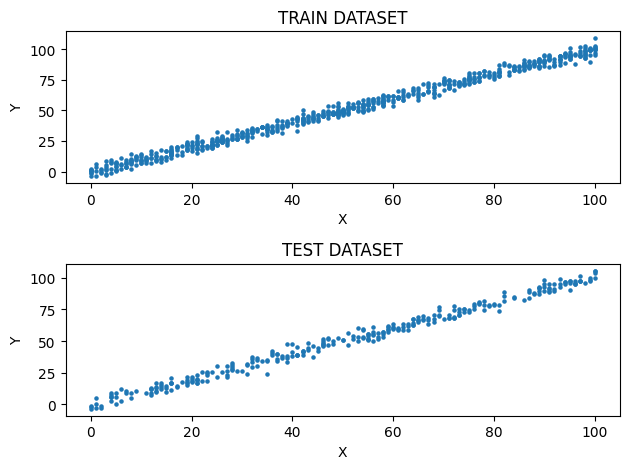

In [10]:
figure,axis = plt.subplots(2,1)
trainX = trainData[::,0]
trainY = trainData[::,1]
axis[0].set_title("TRAIN DATASET")
axis[0].scatter(trainX,trainY,s = 5)
axis[0].set_xlabel('X')
axis[0].set_ylabel('Y')
testX = testData[::,0]
testY = testData[::,1]
axis[1].set_title('TEST DATASET')
axis[1].scatter(testX,testY,s = 5)
axis[1].set_xlabel('X')
axis[1].set_ylabel('Y')
figure.tight_layout()
plt.show()
trainX = trainX.reshape(-1,1)
testX = testX.reshape(-1,1)


Implementing linear regression using inbuilt function

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

clf = LinearRegression()
clf.fit(trainX,trainY)
y_pred = clf.predict(testX)
print(r2_score(testY,y_pred))

0.9888014444327563


Implementing my own gradient descent

In [12]:
def gradientDescent(alpha,it,N):
    A = np.array([0,0]).reshape((1,2))
    X = np.concatenate((np.ones((N,1)),trainX),axis = 1)
    Y = trainY.reshape((N,1))
    Xt = np.transpose(X)
    Yt = np.transpose(Y)
    while (it > 0):
        A = A - alpha/N*(np.matmul(A,np.matmul(Xt,X))-np.matmul(Yt,X))
        Ypred = np.matmul(A,Xt)
        error = Ypred - trainY
        mean_sq_er = np.sum(error**2)/N
        it = it - 1
        if(it%10 == 0):
            print(mean_sq_er)
    return A
A = gradientDescent(0.0001,1000,699)

8.855675467129503
7.871785941396312
7.871493474932629
7.871491514004996
7.8714896398176055
7.871487766595028
7.871485894311462
7.871484022966424
7.871482152559452
7.871480283090068
7.871478414557803
7.8714765469621915
7.871474680302759
7.871472814579042
7.871470949790565
7.8714690859368615
7.871467223017468
7.87146536103191
7.871463499979719
7.871461639860433
7.871459780673576
7.87145792241869
7.871456065095302
7.8714542087029455
7.871452353241155
7.871450498709462
7.871448645107401
7.871446792434509
7.871444940690319
7.871443089874363
7.871441239986175
7.871439391025294
7.871437542991256
7.871435695883592
7.871433849701837
7.87143200444553
7.8714301601142065
7.871428316707405
7.871426474224656
7.8714246326655015
7.871422792029477
7.871420952316118
7.871419113524966
7.871417275655557
7.8714154387074275
7.871413602680117
7.871411767573162
7.871409933386103
7.8714081001184795
7.871406267769828
7.871404436339692
7.871402605827604
7.871400776233112
7.871398947555753
7.871397119795063
7.871

Plotting the curve obtained by performing gradient descent above.

R2 Score: 0.9887734053310671


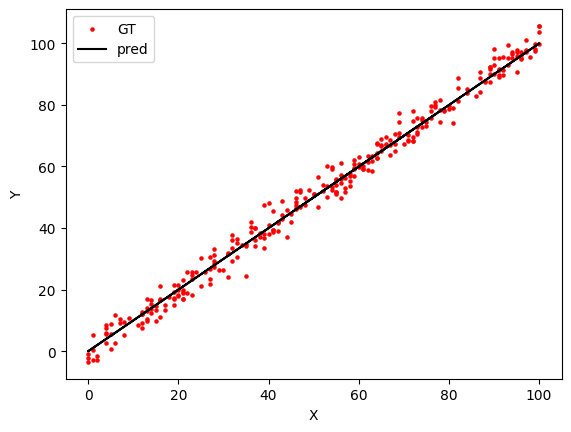

In [13]:
X = np.concatenate((np.ones((300,1)),testX),axis = 1)
predY = np.matmul(X,np.transpose(A))
realY = testY.reshape(300,1)
print('R2 Score:',r2_score(realY,predY))
figure,axis = plt.subplots(1,1)
axis.scatter(testX,testY,color = 'red',s = 5,label = 'GT')
axis.plot(testX,predY,color = 'black',label = 'pred')
axis.set_xlabel('X')
axis.set_ylabel('Y')
plt.legend()
plt.show()